# Time-dependent Zeeman

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as mc

In [34]:
system = mm.System(name='tdfield')
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.2)
system.energy = mm.Zeeman(H=(0, 1/mm.consts.mu0, 1/mm.consts.mu0), wave='sin', f=2e9, t0=1e-9) + mm.Exchange(A=1e-12) + mm.Demag()

mesh = df.Mesh(p1=(0, 0, 0), p2=(5e-9, 5e-9, 5e-9), cell=(1e-9, 1e-9, 1e-9))

system.m = df.Field(mesh, dim=3, value=(0, 1, 1), norm=8e6)

In [35]:
td = mc.TimeDriver()
td.drive(system, t=2e-9, n=300)

Running OOMMF (ExeOOMMFRunner) [2020/06/30 17:39]... (10.6 s)


In [36]:
system.table.data

,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_zeeman,B_zeeman,Bx_zeeman,By_zeeman,Bz_zeeman,...,max_spin_ang_exchange,E_demag,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,1.323368e-18,103.0,27984.511705,-4.502891e-08,-1.333548e-20,-7.408834e-20,1.183383e+02,0.0,8.367784e+01,8.367784e+01,...,144.299846,1.221932e-18,15.0,15.0,0.0,-3.059138e-17,0.442700,0.442700,2.914115e-13,6.666667e-12
1,1.099083e-18,158.0,14780.144183,-2.722733e-08,-1.659321e-20,-1.288719e-19,2.358466e+02,0.0,1.667687e+02,1.667687e+02,...,174.562057,9.770894e-19,25.0,9.0,1.0,-4.691010e-15,0.386379,0.386379,5.971698e-13,1.333333e-11
2,9.374119e-19,201.0,18018.907243,-2.665157e-08,-2.059079e-20,-1.752545e-19,3.517006e+02,0.0,2.486899e+02,2.486899e+02,...,174.562057,8.806403e-19,33.0,7.0,2.0,-1.959104e-14,0.352356,0.352356,7.632573e-13,2.000000e-11
3,7.995033e-19,250.0,14681.591144,-1.672221e-08,-5.962599e-21,-2.441287e-19,4.650877e+02,0.0,3.288666e+02,3.288666e+02,...,174.562057,8.486374e-19,41.0,7.0,3.0,2.935031e-13,0.371167,0.371167,3.509452e-13,2.666667e-11
4,6.915988e-19,287.0,11043.042941,-1.422605e-08,-1.262512e-20,-3.363539e-19,5.752125e+02,0.0,4.067366e+02,4.067366e+02,...,174.562057,8.572442e-19,48.0,6.0,4.0,8.689186e-13,0.413479,0.413479,8.468060e-13,3.333333e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.388356e-19,7652.0,3192.805240,3.623024e-09,5.322556e-21,-1.053443e-19,4.650877e+02,0.0,-3.288666e+02,-3.288666e+02,...,179.064993,2.345464e-19,1454.0,3.0,295.0,-3.685636e-02,-0.142483,-0.177842,1.451903e-12,1.973333e-09
296,2.618001e-19,7671.0,2529.567140,3.268723e-09,2.944060e-21,-6.944408e-20,3.517006e+02,0.0,-2.486899e+02,-2.486899e+02,...,179.064993,2.195458e-19,1458.0,3.0,296.0,-3.221368e-02,-0.126553,-0.152687,8.939489e-13,1.980000e-09
297,2.820942e-19,7696.0,2873.659132,2.771520e-09,4.229607e-21,-4.019949e-20,2.358466e+02,0.0,-1.667687e+02,-1.667687e+02,...,179.064993,2.080283e-19,1462.0,3.0,297.0,-3.072639e-02,-0.116177,-0.124872,1.488507e-12,1.986667e-09
298,2.981016e-19,7715.0,3377.945555,1.999295e-09,3.664732e-21,-1.580964e-20,1.183383e+02,0.0,-8.367784e+01,-8.367784e+01,...,179.064993,1.963931e-19,1466.0,3.0,298.0,-3.085355e-02,-0.099440,-0.089494,1.737616e-12,1.993333e-09


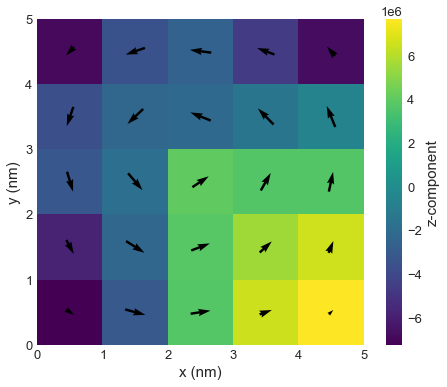

In [37]:
system.m.plane('z').mpl()

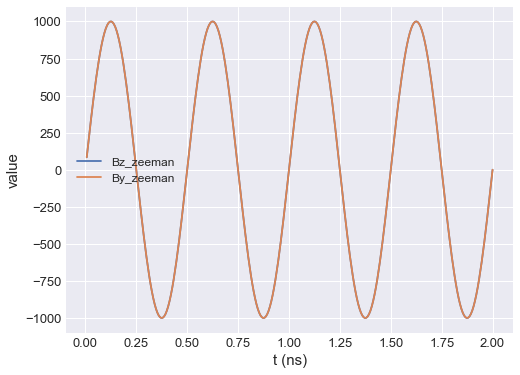

In [38]:
system.table.mpl(yaxis=['Bz_zeeman', 'By_zeeman'])

In [32]:
1e3*mm.consts.mu0

0.0012566370614359172

In [39]:
system.table.data['Bz_zeeman'].to_numpy().max()

999.780683475